In [1]:
import numpy as np
from Gillespie_backend import *
import matplotlib.pyplot as plt
import ellipse as ell
import tqdm
from multiprocessing import Pool
#%matplotlib widget
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (4,3)

In [2]:
Nlinker = 10
ell_tot = 10**3
#kdiff = Nlinker/ (4/3 * np.pi * (ell_tot /2)**1.5)
V = ((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#V = 4/3*np.pi*(ell_tot/6)**1.5
kdiff = 5/V
Energy = -15
seeds = [np.random.randint(0,1000000) for _ in range(10)]
print('critical energy : '+str(1.5*np.log(ell_tot/Nlinker*(np.pi/3))))

step_tot = 10**5
dump_step = 10**3
measurement_step = 10**2

critical energy : 6.976931674754073


In [3]:
Gil = Gillespie(ell_tot=ell_tot,rho0=0.,BindingEnergy=Energy,kdiff=kdiff,seed=19874,sliding=False,Nlinker=10,old_gillespie=None,dimension=1)

In [4]:
R = np.zeros((step_tot,9,3),dtype=float)
S = np.zeros((step_tot),dtype=float)
moves = np.zeros((step_tot),dtype=float)
for step in range(step_tot):
    move,time = Gil.evolve()
    moves[step] = move

In [3]:
S.get_r()

array([[0.        , 0.        , 0.        ],
       [1.59468009, 0.        , 0.        ],
       [4.29608528, 0.        , 0.        ]])

(<Figure size 400x300 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

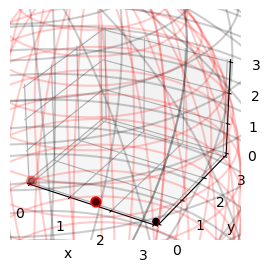

In [17]:
S.Plot3DGillespie()

In [4]:
S.get_ell_coordinates()

array([ 0., 50.])

In [5]:
S.reset_crosslinkers()

In [4]:
S.evolve()

(array([3]), array([0.00115128]))

In [25]:
S.get_R()

array([[1.59468009, 0.        , 0.        ],
       [3.01099631, 0.        , 0.        ]])

In [10]:
S.get_r()

array([[0.        , 0.        , 0.        ],
       [1.59468009, 0.        , 0.        ],
       [4.29608528, 0.        , 0.        ]])

In [6]:
S.Plot3DGillespie()

: 

: 

In [22]:
S.evolve()

(3, 12.086419888133321)

In [18]:
for i in range(step_tot):
    movetype,Dt = S.evolve()
    if np.isnan(Dt):
        raise ValueError
    dt[i] = Dt
    move[movetype] +=1            
time = np.cumsum(dt)

KeyboardInterrupt: 

In [5]:
move

array([9.999898e+06, 1.010000e+02, 0.000000e+00, 1.000000e+00])

In [24]:
S = Gillespie(ell_tot,rho0,BindingEnergy,kdiff=np.exp(BindingEnergy*0.9),seed=19880,sliding=True)
steptot = 10**6
R = list()#np.zeros((steptot,3),dtype=float)
t = list()
moves = np.zeros(4,dtype=float)
for step in range(steptot):
    #print(step)
    bind,time = S.evolve(steps=1)
    moves[bind]+=1
    #if S.get_N_loop()>1:
    #R[step] = S.get_r()[1]
    if t.__len__() == 0:
        t.append(time)
    else :
        t.append(time+t[-1])    
    R.append(S.get_r()[np.argwhere(S.get_r()[:,0]!=0.)[0,0]])
    #print("bind : "+str(bind))
t = np.array(t)*np.exp(BindingEnergy)
R = np.array(R)
moves = moves/sum(moves)

reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset


In [25]:
moves

array([0.491418, 0.017163, 0.      , 0.491419])

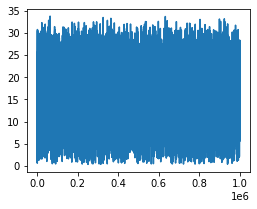

In [22]:
#%matplotlib notebook
#plt.plot(t[50000:],R[50000:,0])
#plt.plot(t,R[:,0])
#plt.plot(t,R[:,1])
#plt.plot(t,R[:,2])
plt.plot(t,np.array([np.linalg.norm(r) for r in R]))
#plt.xlim(20500,21000)

In [21]:
mean_dist = 0.
for i in range(steptot-1):
    mean_dist += np.linalg.norm(R[i])*(t[i+1]-t[i])/steptot
print(mean_dist)
#np.sum(np.array([np.linalg.norm(r) for r in R])*(t[i])/(steptot)

15.630885940055336


(<Figure size 288x216 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

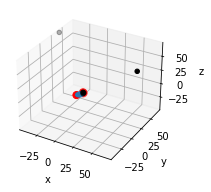

In [27]:
S.Plot3DGillespie()

([<matplotlib.axis.XTick at 0x7f598733e1f0>,
 [Text(0, 0, 'unbind'),
  Text(1, 0, 'diffuse_linker'),
  Text(2, 0, 'slide'),
  Text(3, 0, 'bind')])

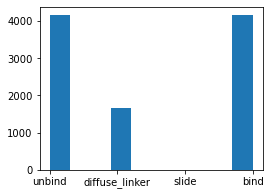

In [30]:
plt.hist(bind)
plt.xticks([0,1,2,3],['unbind','diffuse_linker','slide','bind'])

In [29]:
S.get_ell_coordinates()

array([ 0., 44., 51., 94.])

In [7]:
S.get_ell_coordinates()

array([ 0.,  7., 11., 14., 17., 21., 26., 29., 46., 50., 57., 68., 78.,
       82., 89., 95., 99.])

In [6]:
S.reset_crosslinkers()

In [18]:
def get_av_F(BindingEnergy,rho0):
    teq = 10000
    ell_tot = 1000.
    #rho0 = 1/9
    F,Nloop,time = np.zeros(teq,dtype=float),np.zeros(teq,dtype=float),np.zeros(teq,dtype=float)
    S = Gillespie(ell_tot,rho0,BindingEnergy,seed=19880)
    for t in range(teq):
        F[t] = S.get_F()
        Nloop[t] = S.get_N_loop()
        bind,time[t] = S.evolve()
    return (F,Nloop,time)

In [22]:
fres = list()
for d in np.linspace(5,15,10):
    rho0 = 1/d        
    BindingEnergies = np.linspace(0.,-10,10)
    with Pool(10) as p:
        res = p.map(get_av_F,zip(BindingEnergies,np.array([rho0 for _ in range(BindingEnergies.shape[0])])))
    fres.apend(np.array(res))
fres = np.array(fres)

TypeError: get_av_F() missing 1 required positional argument: 'rho0'

In [13]:
avF = list()
for Flooptime in res:
    avF.append(np.sum(Flooptime[0]*Flooptime[2])/np.sum(Flooptime[2]))

In [14]:
avF

[-2492.4173493462913,
 -2411.2401307466516,
 -2164.34902984414,
 -1476.4816115702497,
 -684.7480325649668,
 -405.9096596268204,
 -299.8710575751285,
 -285.4055930287794,
 -301.7184166152068,
 -292.48173387555937]

In [15]:
avF2 = avF

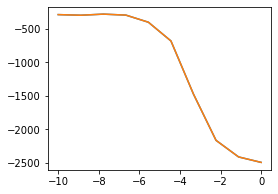

In [16]:
plt.plot(BindingEnergies,avF)
plt.plot(BindingEnergies,avF2)

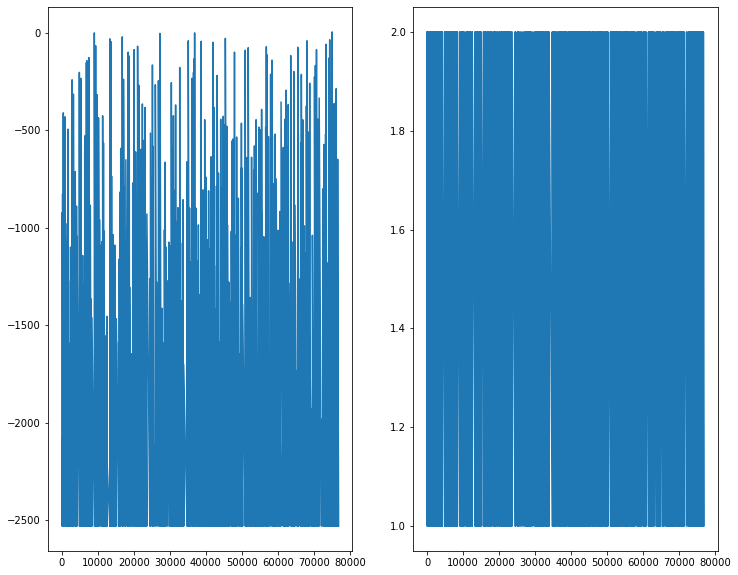

In [68]:
fig,ax = plt.subplots(ncols = 2,figsize=(12,10))
ax[0].plot(np.cumsum(time),F)
ax[1].plot(np.cumsum(time),Nloop)

In [69]:
print(np.sum(F*time)/np.sum(time))

-2523.0635150441876


In [11]:
print(S.get_r_size())
print(S.get_r_gillespie_size())
for t in range(1000):
    if t%100 == 0:
        print(t)
    S.evolve()

183
183
0
100
200
300
400
500
600
700
800
900


(False, 1100.0281168918725)

In [13]:
print(S.get_r().shape)
S.get_R().shape

(61, 3)


(6, 3)

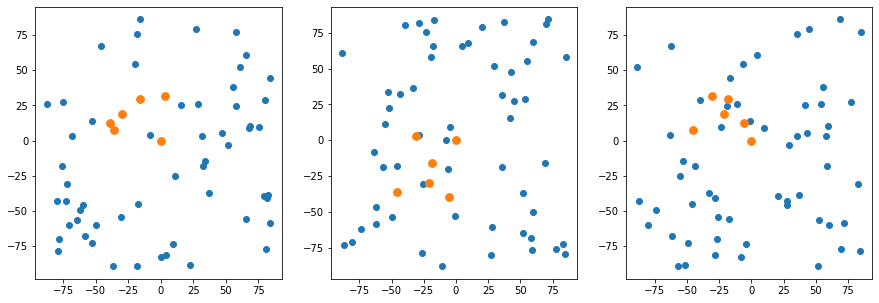

In [14]:
fig,ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].scatter(S.get_r()[:,1],S.get_r()[:,2])
ax[0].scatter(S.get_R()[:,1],S.get_R()[:,2],s=60)

ax[1].scatter(S.get_r()[:,0],S.get_r()[:,1])
ax[1].scatter(S.get_R()[:,0],S.get_R()[:,1],s=60)

ax[2].scatter(S.get_r()[:,0],S.get_r()[:,2])
ax[2].scatter(S.get_R()[:,0],S.get_R()[:,2],s=60)

In [15]:
S.reset_crosslinkers()

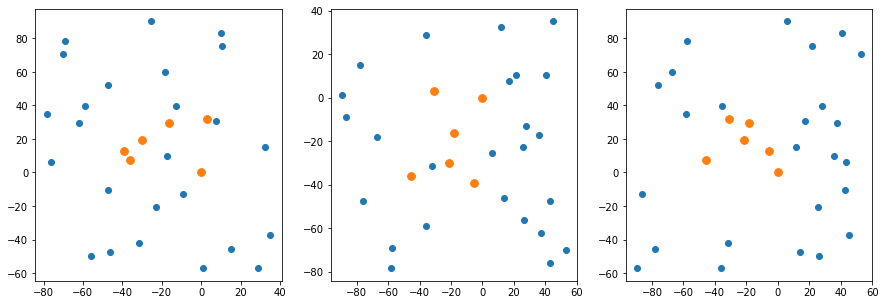

In [16]:
fig,ax = plt.subplots(ncols=3,figsize=(15,5))
ax[0].scatter(S.get_r()[:,1],S.get_r()[:,2])
ax[0].scatter(S.get_R()[:,1],S.get_R()[:,2],s=60)

ax[1].scatter(S.get_r()[:,0],S.get_r()[:,1])
ax[1].scatter(S.get_R()[:,0],S.get_R()[:,1],s=60)

ax[2].scatter(S.get_r()[:,0],S.get_r()[:,2])
ax[2].scatter(S.get_R()[:,0],S.get_R()[:,2],s=60)

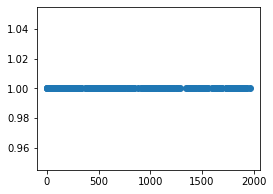

In [9]:
plt.scatter(S.get_ell_coordinates(),np.array([1 for _ in range(S.get_N_loop())]))

In [7]:
N = list()
rsize = list()
Ell = list()
F = list()
for i in range(1000):
    S.evolve()
    N.append(S.get_N_loop())
    rsize.append(S.get_r().shape[0])
    Ell.append(sum(S.get_ell()))
    F.append(S.get_F())
N = np.array(N)
rsize=np.array(rsize)
Ell= np.array(Ell)
F = np.array(F)

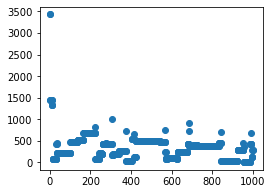

In [8]:
plt.close()
#plt.scatter(np.arange(0,N.shape[0],1),N)
#plt.scatter(np.arange(0,rsize.shape[0],1),rsize)
#plt.scatter(np.arange(0,Ell.shape[0],1),Ell)
plt.scatter(np.arange(0,F.shape[0],1),F)

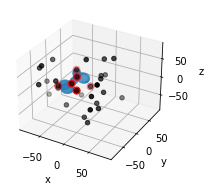

In [17]:
plt.close()
fig,ax = S.Plot3DGillespie()
#plt.close()

: 

: 

In [6]:
print(S.get_ell())
print(S.get_R())

[642.]
[[  0.           0.           0.        ]
 [-16.097395   -26.77912392  -2.05946978]]


In [4]:
time_tot = 10000
Ells = np.zeros(time_tot,dtype=float)
Ns = np.zeros(time_tot,dtype=float)
time_bind = list()
time_ub = list()
time = np.zeros(time_tot,dtype=float)
for t in tqdm.tqdm(range(time_tot)):
    bind, dt = S.evolve()
#    for n,ell in enumerate(S.get_ell()):
#        if ell<np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]):
#            print(bind)
#            print(S.get_ell())
#            print(S.get_R())
#            for n,ell in enumerate(S.get_ell()):
#                print(np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]))
#            raise GillespieExit('error in code want to exit')
    R = S.get_R()       
    r = S.get_r()
    if bind :
        time_bind.append(dt)
    else:
        time_ub.append(dt)
    if t!=0:
        time[t]= time[t-1]+dt
    else:
        time[t] = dt
    Ells[t] = np.mean(S.get_ell())
    Ns[t] = S.get_N_loop()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11577.02it/s]


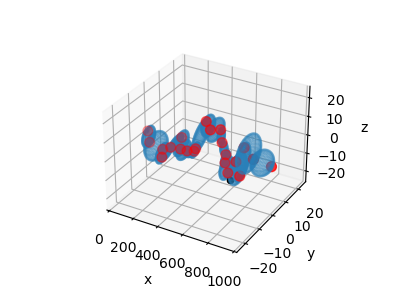

In [5]:
plt.close()
fig,ax = S.Plot3DGillespie()
plt.show()

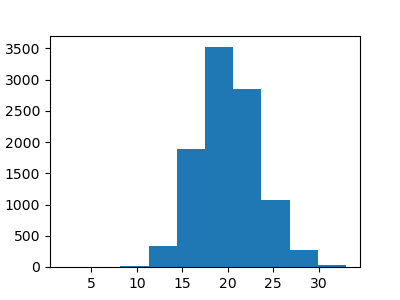

In [6]:
plt.close()
plt.hist(Ns)
plt.show()


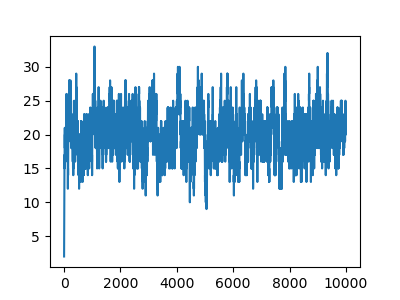

In [7]:
plt.close()
fig,ax = plt.subplots()
#lt.plot(np.arange(0,time_tot,1),time/tau_0)
plt.plot(np.arange(0,time_tot,1),Ns)
#plt.hist(time_bind,bins=100)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [8]:
S.get_ell()

array([ 77., 179.,  77.,  46.,  40., 116.,  83.,  32.,  49., 104.,  87.,
       120.,  27.,  23.,  45.,  98.,  68., 171., 146., 284., 128.])